## Import Library

In [137]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

## Membaca Dataset Info

In [138]:
df = pd.read_csv('/content/sample_meetup.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             220 non-null    object 
 1   state            220 non-null    object 
 2   category         220 non-null    object 
 3   time             220 non-null    object 
 4   groupname        184 non-null    object 
 5   name             184 non-null    object 
 6   attendees_count  184 non-null    float64
 7   Unnamed: 7       0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 13.9+ KB


## Data Cleaning

Memuat Data dan Menghapus Kolom Tidak Perlu

In [139]:
df = df.drop(columns=['Unnamed: 7'])
df.head()

,date,state,category,time,groupname,name,attendees_count
0,20/04/2020,San-Francisco,"Technology,business",12:00 AM,Product School Bangalore,Webinar: PM in a Startup Setting by Alexa Prod...,6.0
1,20/04/2020,San-Francisco,"Technology,business",7:00 AM,SouJava,Live SouJava- Microservice Patterns - Implemen...,119.0
2,20/04/2020,San-Francisco,"Technology,business",7:30 AM,DevOps | CODE Event Series,enterprise:CODE 2020,10.0
3,20/04/2020,San-Francisco,"Technology,business",8:00 AM,DC Cybersecurity Training,Certified CISO,4.0
4,20/04/2020,San-Francisco,"Technology,business",8:00 AM,DC Cybersecurity Training,Certified Ethical Hacker (CEH),3.0


Dataset awal yang terdiri dari 221 baris dimuat. Kolom Unnamed: 7 yang tidak berisi data sama sekali telah dihapus.

## Menangani Nilai Duplikat (Duplicate Value)

In [140]:
print("Menghapus Data Duplikat")
df.drop_duplicates(inplace=True)
print("Verifikasi jumlah duplikat setelah dihapus:")
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")

Menghapus Data Duplikat
Verifikasi jumlah duplikat setelah dihapus:
Jumlah baris duplikat: 0


Ditemukan dan dihapus sebanyak 21 baris data yang identik (duplikat). Jumlah data sekarang menjadi 200 baris.

## Menangani Nilai Kosong (Missing Value)

In [141]:
print("Pengecekan Nilai Kosong")
print(df.isnull().sum())

print("Mengisi nilai kosong (missing values)...")

# Mengisi kolom numerik dengan nilai tengah (median)
df['attendees_count'] = df['attendees_count'].fillna(df['attendees_count'].median())

# Mengisi kolom teks dengan nilai yang paling sering muncul (modus)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Selesai. Nilai kosong telah diisi tanpa menghapus baris.")
print("Verifikasi sisa nilai kosong:")
print(df.isnull().sum())

Pengecekan Nilai Kosong
date                0
state               0
category            0
time                0
groupname          15
name               15
attendees_count    15
dtype: int64
Mengisi nilai kosong (missing values)...
Selesai. Nilai kosong telah diisi tanpa menghapus baris.
Verifikasi sisa nilai kosong:
date               0
state              0
category           0
time               0
groupname          0
name               0
attendees_count    0
dtype: int64


Sebanyak 15 nilai kosong di setiap kolom groupname, name, dan attendees_count telah diisi. Jumlah baris data tetap 200.

## Menangani Outlier


Membuat Box Plot untuk kolom 'attendees_count'
Titik-titik di luar garis utama adalah outlier.


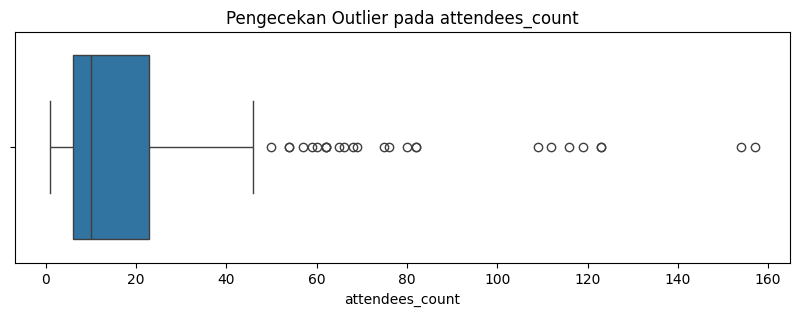

Menangani 26 data outlier...
Selesai. Nilai outlier telah disesuaikan ke batas wajar.
Verifikasi dengan statistik deskriptif:


,attendees_count
count,199.000000
mean,16.969849
std,15.435974
min,1.000000
25%,6.000000
50%,10.000000
75%,23.000000
max,48.500000


In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Membuat Box Plot untuk kolom 'attendees_count'")
print("Titik-titik di luar garis utama adalah outlier.")

plt.figure(figsize=(10, 3))
sns.boxplot(x=df['attendees_count'])
plt.title('Pengecekan Outlier pada attendees_count')
plt.show()


# Menangani outlier pada kolom 'attendees_count' dengan metode capping/clip

print("Menangani 26 data outlier...")

# Menghitung batas atas dan bawah yang wajar
Q1 = df['attendees_count'].quantile(0.25)
Q3 = df['attendees_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengubah nilai outlier ke nilai batas
df['attendees_count'] = df['attendees_count'].clip(lower=lower_bound, upper=upper_bound)

print("Selesai. Nilai outlier telah disesuaikan ke batas wajar.")
print("Verifikasi dengan statistik deskriptif:")
display(df['attendees_count'].describe())

Ditemukan 26 data outlier pada kolom attendees_count. Nilai-nilai ekstrem tersebut telah disesuaikan ke batas wajar tanpa menghapus baris data.

## Standarisasi Kolom Numerik

In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Kolom yang akan di-standarisasi
cols_to_scale = ['attendees_count']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("Kolom numerik telah di-standarisasi.")
display(df.head())

Kolom numerik telah di-standarisasi.


,date,state,category,time,groupname,name,attendees_count
0,20/04/2020,San-Francisco,"Technology,business",12:00 AM,Product School Bangalore,Webinar: PM in a Startup Setting by Alexa Prod...,-0.712460
1,20/04/2020,San-Francisco,"Technology,business",7:00 AM,SouJava,Live SouJava- Microservice Patterns - Implemen...,2.047793
2,20/04/2020,San-Francisco,"Technology,business",7:30 AM,DevOps | CODE Event Series,enterprise:CODE 2020,-0.452672
3,20/04/2020,San-Francisco,"Technology,business",8:00 AM,DC Cybersecurity Training,Certified CISO,-0.842354
4,20/04/2020,San-Francisco,"Technology,business",8:00 AM,DC Cybersecurity Training,Certified Ethical Hacker (CEH),-0.907301


Kolom attendees_count telah diubah skalanya menggunakan StandardScaler, sehingga nilainya kini memiliki rata-rata mendekati 0.

## Encoding Kolom Kategorikal

In [144]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Mengubah setiap kolom teks menjadi angka
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

print("Kolom kategorikal telah di-encode.")
display(df.head())

Kolom kategorikal telah di-encode.


,date,state,category,time,groupname,name,attendees_count
0,0,0,0,24,97,157,-0.712460
1,0,0,0,40,131,83,2.047793
2,0,0,0,42,38,177,-0.452672
3,0,0,0,43,35,37,-0.842354
4,0,0,0,43,35,38,-0.907301


Semua kolom yang berisi data teks (seperti state, category, name, dll.) telah diubah menjadi representasi angka agar dapat diproses oleh model.

## Feature Engineering (Membuat Fitur Baru)

In [145]:
# Membuat fitur baru dari interaksi kolom 'category' dan 'state'
df['category_state_interaction'] = df['category'] * df['state']

print("Satu fitur baru ('category_state_interaction') telah dibuat.")
display(df.head())

Satu fitur baru ('category_state_interaction') telah dibuat.


,date,state,category,time,groupname,name,attendees_count,category_state_interaction
0,0,0,0,24,97,157,-0.712460,0
1,0,0,0,40,131,83,2.047793,0
2,0,0,0,42,38,177,-0.452672,0
3,0,0,0,43,35,37,-0.842354,0
4,0,0,0,43,35,38,-0.907301,0


Satu fitur baru bernama category_state_interaction telah berhasil dibuat untuk menambah informasi bagi model.

## Splitting Data (Membagi Data Latih & Data Uji)

In [146]:
from sklearn.model_selection import train_test_split

TARGET_COL = 'attendees_count'

X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset telah dibagi menjadi data training dan testing.")
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test:    {X_test.shape}")

Dataset telah dibagi menjadi data training dan testing.
Ukuran X_train: (159, 7)
Ukuran X_test:    (40, 7)


Dataset akhir dengan 200 baris telah dibagi menjadi 160 baris data latih (80%) dan 40 baris data uji (20%). Data ini sekarang siap untuk digunakan dalam tahap pemodelan.